In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Read in data and look for missing values
heart_df = pd.read_csv("heart_cleveland_upload.csv")
heart_df
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [4]:
#checking for missing values and imputing if necessary
count=heart_df.nunique()
print(count)
#no missing values, no unncessary columns either

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

<AxesSubplot:>

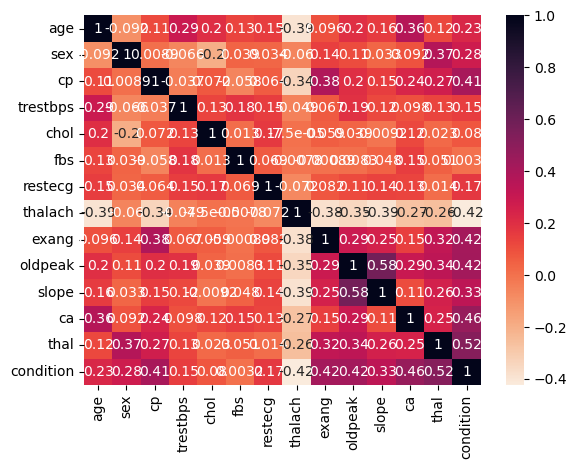

In [8]:
#correlation matrix for all features
cmap = sns.cm.rocket_r
sns.heatmap(heart_df.corr(), annot=True, cmap=cmap)

#correlations for all values
#age           0.227075  
#sex           0.278467  
#cp            0.408945  
#trestbps      0.153490  
#chol          0.080285  
#fbs           0.003167  
#restecg       0.166343  
#thalach      -0.423817  
#exang         0.421355  
#oldpeak       0.424052  
#slope         0.333049  
#ca            0.463189  
#thal          0.520516  
#condition     1.000000 

(array([ 2.,  0.,  2.,  2.,  1.,  3.,  3.,  5.,  2.,  3.,  5.,  3.,  5.,
         6.,  5., 16., 12., 18.,  7.,  7., 10.,  4.,  9.,  2.,  1.,  3.,
         0.,  0.,  0.,  1.]),
 array([35. , 36.4, 37.8, 39.2, 40.6, 42. , 43.4, 44.8, 46.2, 47.6, 49. ,
        50.4, 51.8, 53.2, 54.6, 56. , 57.4, 58.8, 60.2, 61.6, 63. , 64.4,
        65.8, 67.2, 68.6, 70. , 71.4, 72.8, 74.2, 75.6, 77. ]),
 <BarContainer object of 30 artists>)

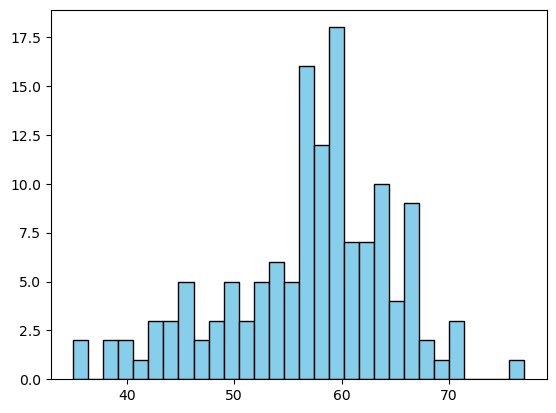

In [24]:
#Separate condition into two different dataframes, one where condition is true and another where it is negative
#Plotting the histogram for each to look at differences between distributions
condition = heart_df['condition'] == 1
positive_condition = heart_df[condition]
negative_condition = heart_df[~condition]
plt.hist(positive_condition['age'], bins=30, color='skyblue', edgecolor='black')

(array([ 1.,  0.,  0.,  4.,  0.,  2.,  3., 10., 12.,  8., 10.,  3.,  7.,
         4., 17., 15.,  3., 12.,  6.,  8.,  1.,  7., 10.,  4.,  5.,  2.,
         4.,  0.,  1.,  1.]),
 array([29.        , 30.56666667, 32.13333333, 33.7       , 35.26666667,
        36.83333333, 38.4       , 39.96666667, 41.53333333, 43.1       ,
        44.66666667, 46.23333333, 47.8       , 49.36666667, 50.93333333,
        52.5       , 54.06666667, 55.63333333, 57.2       , 58.76666667,
        60.33333333, 61.9       , 63.46666667, 65.03333333, 66.6       ,
        68.16666667, 69.73333333, 71.3       , 72.86666667, 74.43333333,
        76.        ]),
 <BarContainer object of 30 artists>)

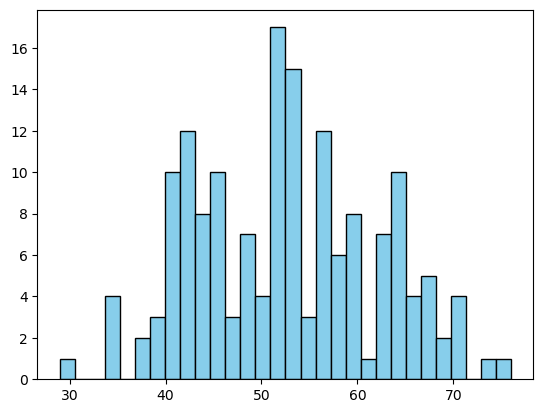

In [25]:
plt.hist(negative_condition['age'], bins=30, color='skyblue', edgecolor='black')

In [34]:
#splitting data up
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

y = heart_df['condition']
X = heart_df.drop(['condition'], axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=5)

[[31  6]
 [ 6 17]]
              precision    recall  f1-score   support

   condition       0.84      0.84      0.84        37
no condition       0.74      0.74      0.74        23

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



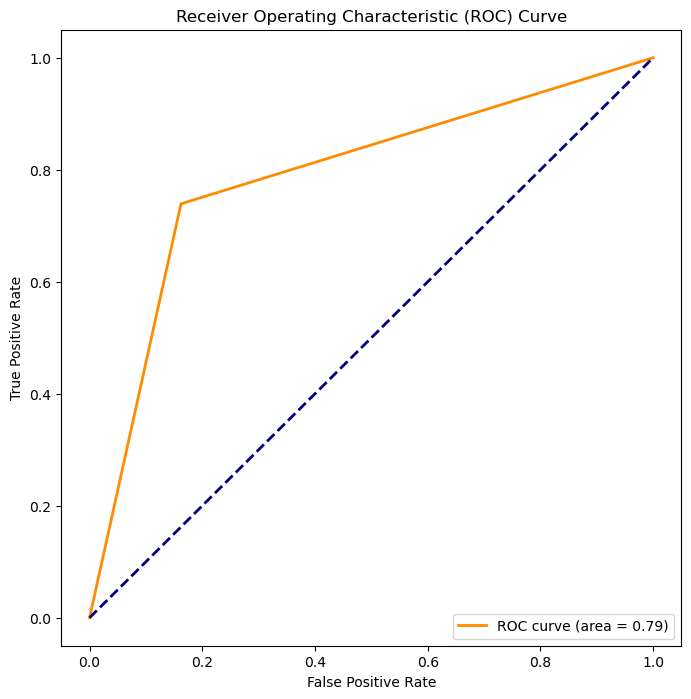

In [52]:
#Logistic non-scaled
from sklearn.metrics import roc_curve, auc

#Create logistic regression
logreg = LogisticRegression(random_state=5)

# fit the model with data
logreg.fit(X_train, y_train)

#use model to predict
y_pred = logreg.predict(X_test)

#create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#evaluate statistics
target_names = ['condition', 'no condition']
print(classification_report(y_test, y_pred, target_names=target_names))

#Create values for AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[27  8]
 [ 4 21]]
              precision    recall  f1-score   support

   condition       0.87      0.77      0.82        35
no condition       0.72      0.84      0.78        25

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



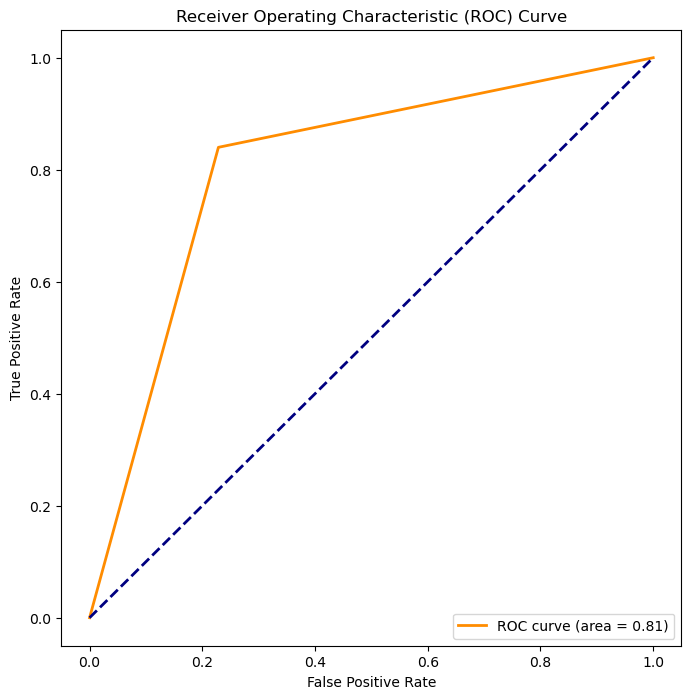

In [53]:
#Logistic scaled
from sklearn.preprocessing import StandardScaler
log_clone = heart_df
y_r = log_clone['condition']
X_r = log_clone.drop(['condition'], axis=1)
X_r = X.values
y_r = y.values

#scale the data
scaler = StandardScaler()
scaler.fit(X_r)
X_scaled = scaler.transform(X_r)

X_train, X_test, y_train, y_test=train_test_split(X_scaled,y_r,test_size=0.2, random_state=5)

logreg = LogisticRegression(random_state=5)

# fit the model with data
logreg.fit(X_train, y_train)

#use model to predict
y_pred = logreg.predict(X_test)

#create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#create statistics to evaluate model
target_names = ['condition', 'no condition']
print(classification_report(y_test, y_pred, target_names=target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[30  7]
 [ 5 18]]
              precision    recall  f1-score   support

   condition       0.86      0.81      0.83        37
no condition       0.72      0.78      0.75        23

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.80      0.80      0.80        60



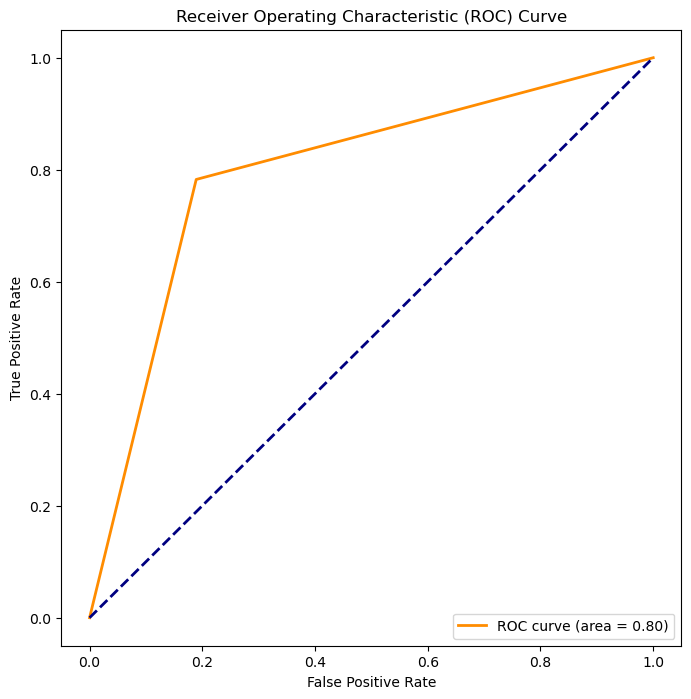

In [54]:
#Random Forest scaled
from sklearn.ensemble import RandomForestClassifier

for_clone = heart_df
y_f = for_clone['condition']
X_f = for_clone.drop(['condition'], axis=1)
X_f = X_f.values
y_f = y_f.values
scaler = StandardScaler()
scaler.fit(X_f)
X_scaled = scaler.transform(X_f)

X_train, X_test, y_train, y_test=train_test_split(X_scaled,y_f,test_size=0.2, random_state=3)

clf = RandomForestClassifier(n_estimators=100, random_state=67)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#create statistics to evaluate model
target_names = ['condition', 'no condition']
print(classification_report(y_test, y_pred, target_names=target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[30  7]
 [ 5 18]]
              precision    recall  f1-score   support

   condition       0.86      0.81      0.83        37
no condition       0.72      0.78      0.75        23

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.80      0.80      0.80        60



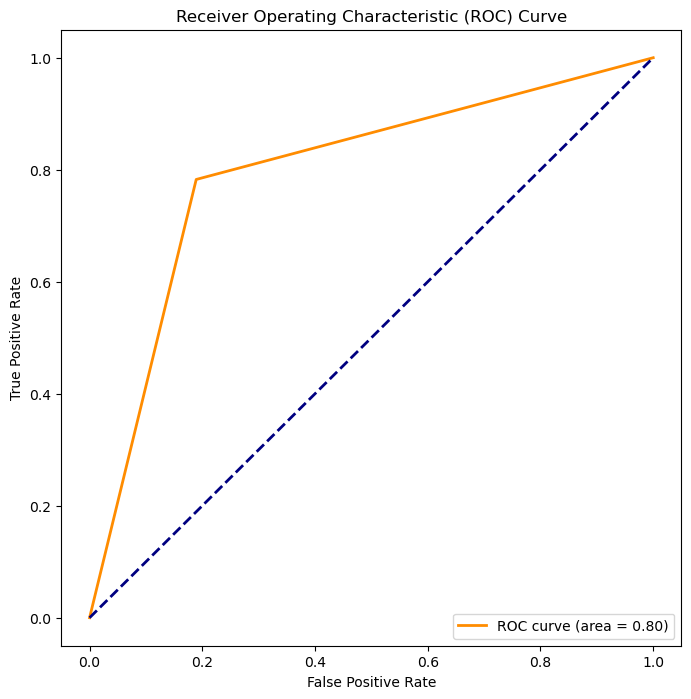

In [55]:
#Random forest non-scaled
fore_clone = heart_df
y_fe = fore_clone['condition']
X_fe = fore_clone.drop(['condition'], axis=1)
X_fe = X_fe.values
y_fe = y_fe.values

X_train, X_test, y_train, y_test=train_test_split(X_fe,y_fe,test_size=0.2, random_state=3)

clf = RandomForestClassifier(n_estimators=100, random_state=67)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#create statistics to evaluate model
target_names = ['condition', 'no condition']
print(classification_report(y_test, y_pred, target_names=target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[27  6]
 [ 4 23]]
              precision    recall  f1-score   support

   condition       0.87      0.82      0.84        33
no condition       0.79      0.85      0.82        27

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



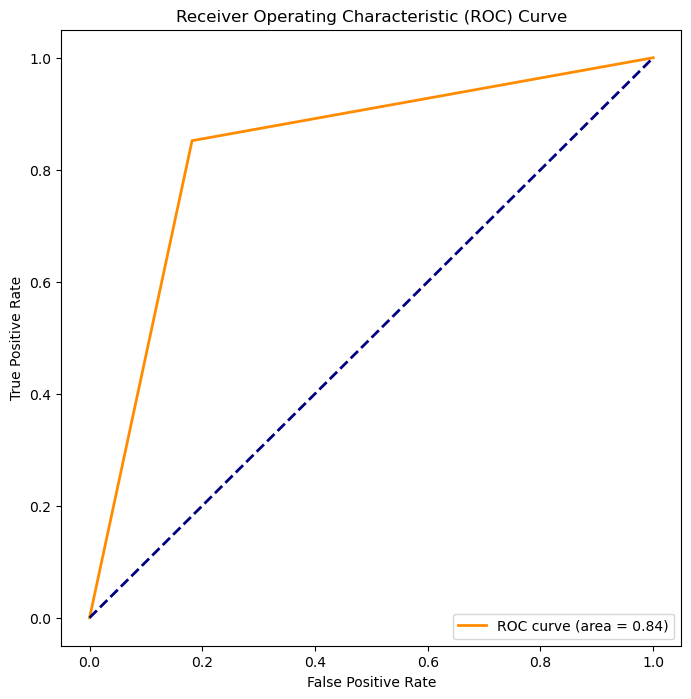

In [56]:
#SGD classifier

from sklearn.linear_model import SGDClassifier

sgd_clone = heart_df
y_sgd = sgd_clone['condition']
X_sgd = sgd_clone.drop(['condition'], axis=1)
X_sgd = X_sgd.values
y_sgd = y_sgd.values

X_train, X_test, y_train, y_test=train_test_split(X_scaled,y_sgd,test_size=0.2, random_state=10)

clf = SGDClassifier(max_iter=1000, random_state=32)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#create statistics to evaluate model
target_names = ['condition', 'no condition']
print(classification_report(y_test, y_pred, target_names=target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[27  6]
 [ 4 23]]
              precision    recall  f1-score   support

   condition       0.87      0.82      0.84        33
no condition       0.79      0.85      0.82        27

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



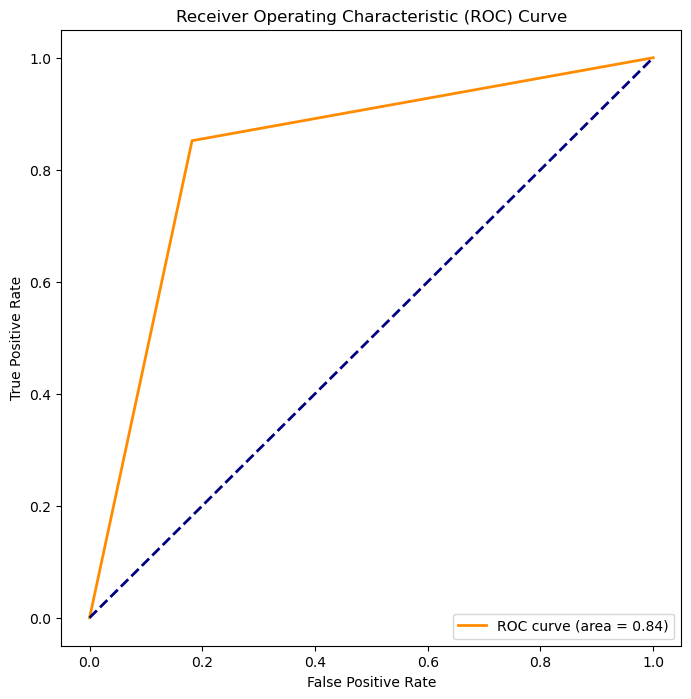

In [57]:
#SGD classifier with scaled values


sgd_clone = heart_df
y_sgd = sgd_clone['condition']
X_sgd = sgd_clone.drop(['condition'], axis=1)
X_sgd = X_sgd.values
y_sgd = y_sgd.values
scaler = StandardScaler()
scaler.fit(X_sgd)
X_scaled_sgd = scaler.transform(X_sgd)

X_train, X_test, y_train, y_test=train_test_split(X_scaled_sgd,y_sgd,test_size=0.2, random_state=10)

clf = SGDClassifier(max_iter=1000, random_state=32)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#create statistics to evaluate model
target_names = ['condition', 'no condition']
print(classification_report(y_test, y_pred, target_names=target_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

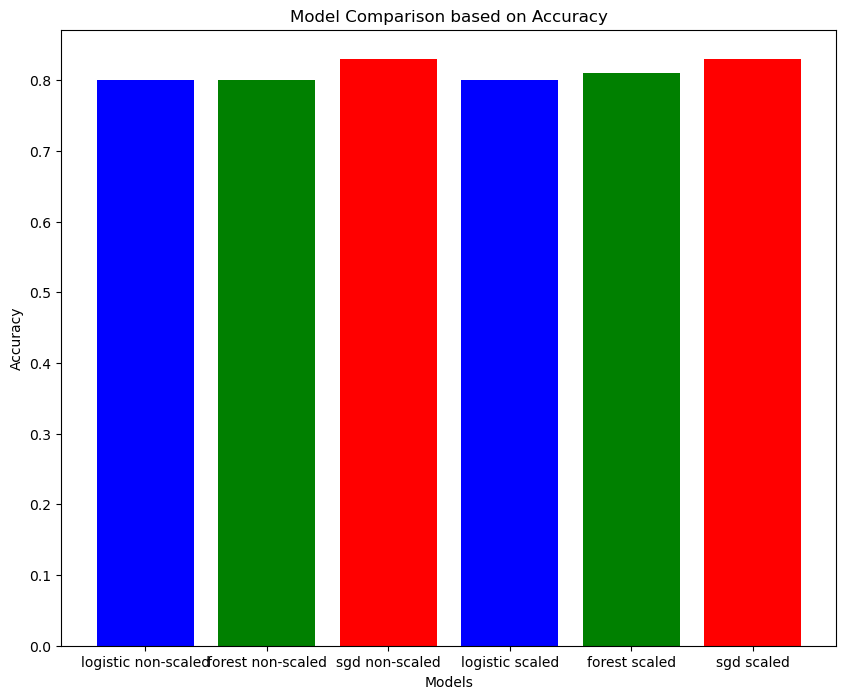

In [58]:
#total evaluation
models = ['logistic non-scaled', 'forest non-scaled', 'sgd non-scaled', 'logistic scaled', 'forest scaled', 'sgd scaled']
accuracies = [0.8, 0.8, 0.83, .8, .81, .83]

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison based on Accuracy')
plt.show()

In [59]:
#SUMMARY FINDINGS
#In this report, we looked at Cleveland UCI heart health dataset to determine a potential diagnosis of heart disease bas
#around a variety of factors, including age, sex, and 11 other categories
#We did not need to clean the data as there were no missing values and the individual columns had more than 1 unique value.
#We used the 80-20 rule to create and train 3 different ML models (logistic, random forest, and sgd classifier)
#In order to evaluate the success of these models we looked at a classification matrix and statistics such as accuracy. 
#Additionally we looked at ROC curves for each model
#Each model was run 2 times, once with scaled features and once without scaled features
#Overall, there was very literally difference between the success of the models with scaled and non-scaled data
#These models performed fairly well, but it must be taken in context of what we are predicting. 
#With our models near 80% accuracy, there still would be room left open for mistakes and potentially result in a loss
#of lives if relied on solely. These models are tools that should be utilized in conjunction with traditional methods.
#Fun assignment!

In [ ]:
#I was able to get the coupon code to work and I'm making my through their introductory courses! 
#I'll have more detailed findings later on this week. Hope you have a great break!